## A deeper look into Covid in Portugal

We are interested in analysing Covid data in portugal, understand the evolution of confirmed and active cases, as well as deaths, vaccinations, and much more. To do that we are going to use the data from this [github repository](https://github.com/dssg-pt/covid19pt-data), that collects _all_ of the data covid-wise in Portugal.


![Image of meme](https://static.thehoneycombers.com/wp-content/uploads/sites/4/2020/03/Best-funny-Coronavirus-memes-2020-Honeycombers-Bali-6.jpg)


First lets take a quick glance at the data.

### Preliminaries

We are going to use Python and one of its most known libraries, [pandas](https://pandas.pydata.org/), to explore and analyse this Covid data.

1. Python is a programming language, i.e you can do pretty much whatever with it. (Data Science, Games, Web and Mobile apps)
2. This is a jupyter notebook (one of the more typical ways to explore data)
3. Pandas is a python library that is composed by DataFrames (tables) which in turn are composed of Series (one dimensional arrays)


### Initial Setup

Here we are importing libraries (code made by someone else) to agilize our exploration.

In [1]:
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Help us to create plots.

### DataFrame Example
Lets just go through some basics first

In [29]:
pd.DataFrame([1,2,3,4,5])

,0
0,1
1,2
2,3
3,4
4,5


In [32]:
data = {"A":[1,2,3,4,5]}
pd.DataFrame(data)

,A
0,1
1,2
2,3
3,4
4,5


In [39]:
values =["Bill Gates","Jeff Bezos"]
index = ["Microsoft","Amazon"]
pd.DataFrame(index = index, data = {"Founders":values})

,Founders
Microsoft,Bill Gates
Amazon,Jeff Bezos


## Now that we are experts at DataFraming, lets now look at covid

First things first, we need to import the data from the github repository. They have several files, but for now we are only going to get **"data.csv"**

In [2]:
covid_data = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
df = pd.read_csv(covid_data)
df

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,10-06-2021,10-06-2021 00:00,855432,341921,120348,324807,30378,22536,5666,9776,...,8951.0,NaN,NaN,24366.0,223.0,391.0,74.8,73.6,1.05,1.07
471,11-06-2021,11-06-2021 00:00,855951,342069,120369,325081,30398,22558,5703,9773,...,8951.0,NaN,NaN,24589.0,234.0,399.0,79.3,78.4,1.07,1.08
472,12-06-2021,12-06-2021 00:00,856740,342223,120431,325561,30412,22583,5747,9783,...,8951.0,NaN,NaN,24601.0,223.0,396.0,79.3,78.4,1.07,1.08
473,13-06-2021,13-06-2021 00:00,857447,342340,120489,326011,30428,22619,5774,9786,...,8952.0,NaN,NaN,25058.0,243.0,400.0,79.3,78.4,1.07,1.08


Now that we have the data, lets just explore it. 

In [3]:
df.head()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
470,10-06-2021,10-06-2021 00:00,855432,341921,120348,324807,30378,22536,5666,9776,...,8951.0,NaN,NaN,24366.0,223.0,391.0,74.8,73.6,1.05,1.07
471,11-06-2021,11-06-2021 00:00,855951,342069,120369,325081,30398,22558,5703,9773,...,8951.0,NaN,NaN,24589.0,234.0,399.0,79.3,78.4,1.07,1.08
472,12-06-2021,12-06-2021 00:00,856740,342223,120431,325561,30412,22583,5747,9783,...,8951.0,NaN,NaN,24601.0,223.0,396.0,79.3,78.4,1.07,1.08
473,13-06-2021,13-06-2021 00:00,857447,342340,120489,326011,30428,22619,5774,9786,...,8952.0,NaN,NaN,25058.0,243.0,400.0,79.3,78.4,1.07,1.08
474,14-06-2021,14-06-2021 00:00,858072,342464,120517,326412,30438,22653,5799,9789,...,8952.0,NaN,NaN,25403.0,263.0,407.0,84.5,83.4,1.09,1.10


In [5]:
df.columns

Index(['data', 'data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
     

In [6]:
#what if
#data["..."]

What about doing a quick visualization of 'confirmados' and 'activos' ? 

Hmm, idk that looks difficult.

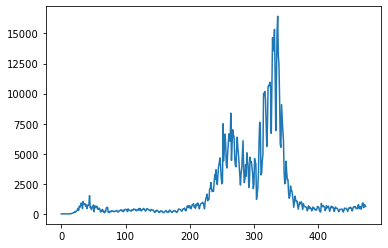

In [7]:
df["confirmados_novos"].plot()

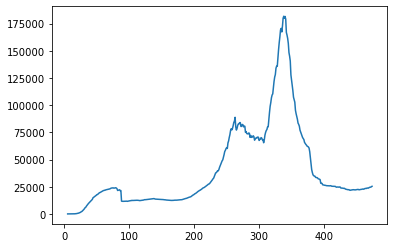

In [8]:
df["ativos"].plot()

The x axis should be dates right? What's going on? Lets look at the data again

In [9]:
df.head()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The x axis should be 'data' or 'data_dados' right? However, in the plot the x are just numeric values starting in 0 going hover 400. Can you figure out why ?

In [10]:
date_parser = lambda date_str: pd.to_datetime(date_str,format='%d-%m-%Y')

In [11]:
df = pd.read_csv(covid_data,index_col=0,date_parser=date_parser)

### New syntax alert! 
*lambda* is used to define functions as an alternative to the _def_ keyword

In [12]:
#alternative way more 'common' way
def date_parser(date_str):
    return pd.to_datetime(date_str,format='%d-%m-%Y')

In [13]:
df

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,10-06-2021 00:00,855432,341921,120348,324807,30378,22536,5666,9776,NaN,...,8951.0,NaN,NaN,24366.0,223.0,391.0,74.8,73.6,1.05,1.07
2021-06-11,11-06-2021 00:00,855951,342069,120369,325081,30398,22558,5703,9773,NaN,...,8951.0,NaN,NaN,24589.0,234.0,399.0,79.3,78.4,1.07,1.08
2021-06-12,12-06-2021 00:00,856740,342223,120431,325561,30412,22583,5747,9783,NaN,...,8951.0,NaN,NaN,24601.0,223.0,396.0,79.3,78.4,1.07,1.08


You should have noticed that this "confirmados" column is a cumulative column. Lets take a look at 'confirmados_novos'

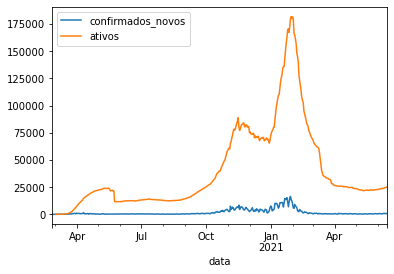

In [14]:
df[["confirmados_novos","ativos"]].plot()

The data has different amplitudes, so, in order to help us just understand the correlation better lets normalize it between [0,1] (just divide every value by the maximum value of that collumn)

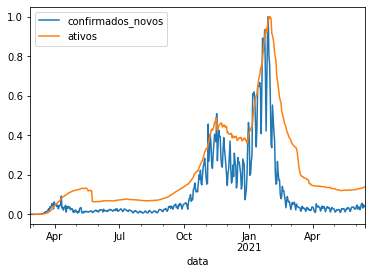

In [15]:
df[["confirmados_novos","ativos"]].apply(lambda x: x/x.max()).plot()

### New syntax alert! 

[.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) -'Apply a function along an axis of the DataFrame.'

In [16]:
#Simple example with mask, answer a simple and medium question ? What happen at X date ? What dates happen Y ? 

# Whats the worst week ? - resample

In [23]:
df

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,10-06-2021 00:00,855432,341921,120348,324807,30378,22536,5666,9776,NaN,...,8951.0,NaN,NaN,24366.0,223.0,391.0,74.8,73.6,1.05,1.07
2021-06-11,11-06-2021 00:00,855951,342069,120369,325081,30398,22558,5703,9773,NaN,...,8951.0,NaN,NaN,24589.0,234.0,399.0,79.3,78.4,1.07,1.08
2021-06-12,12-06-2021 00:00,856740,342223,120431,325561,30412,22583,5747,9783,NaN,...,8951.0,NaN,NaN,24601.0,223.0,396.0,79.3,78.4,1.07,1.08


##### What if we just want a subset of the data? How do we select the data?

In [24]:
mask = df.rt_nacional == 1

In [26]:
df.loc[mask]

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
data,,,,,,,,,,,,,,,,,,,,,
2021-04-19,19-04-2021 00:00,831221,333832,118149,314733,29568,21391,4554,8994,NaN,...,8903.0,NaN,NaN,25059.0,342.0,302.0,71.8,68.1,1.0,1.00
2021-04-20,20-04-2021 00:00,831645,333961,118183,314886,29609,21419,4570,9017,NaN,...,8906.0,NaN,NaN,24576.0,316.0,305.0,71.8,68.1,1.0,1.00
2021-04-28,28-04-2021 00:00,835563,335648,118582,316065,29756,21619,4723,9170,NaN,...,8914.0,NaN,NaN,23809.0,244.0,310.0,69.3,66.5,1.0,1.00
2021-04-29,29-04-2021 00:00,836033,335861,118631,316208,29765,21632,4743,9193,NaN,...,8914.0,NaN,NaN,23733.0,235.0,312.0,69.3,66.5,1.0,1.00
2021-05-17,17-05-2021 00:00,842381,338401,119291,318123,29982,22025,5058,9501,NaN,...,8935.0,NaN,NaN,22181.0,174.0,351.0,50.5,47.5,1.0,0.99
2021-05-18,18-05-2021 00:00,842767,338532,119311,318298,29994,22035,5087,9510,NaN,...,8937.0,NaN,NaN,21997.0,167.0,354.0,50.5,47.5,1.0,0.99


### New syntax alert
[.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) -'Access a group of rows and columns by label(s) or a boolean array.'


In [17]:
#TODO Vacc exercise notebook:
# Exercises time get vaccines data.

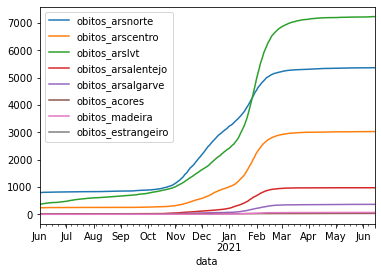

In [28]:
#For future reference
df.loc['June 2020':].filter(regex="obitos_[a-z][a-z]+").plot()

What was the worst month/week ? 

Which region had the best month (lowest covid case) ?

In [19]:
## Resample
## Filter
## Use vacc data merge with covid

### Exercises

1. How many people died when r(t) was higher than 1.05? 
2. Whats the date with the *highest* *new* confirmed cases in *arsnorte*?
3. Plot the pct per day of the confirmed by region 

## Lets study the impact of vaccines

We already looked at covid data and you already looked at vaccines data. Now we just have to _merge_ them!

In [20]:
#Get vaccines data
vacc_data = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/vacinas.csv'

df_vac = pd.read_csv(vacc_data,index_col=0,date_parser=date_parser)

In [21]:
df_vac.columns

Index(['doses', 'doses_novas', 'doses1', 'doses1_novas', 'doses2',
       'doses2_novas', 'pessoas_vacinadas_completamente',
       'pessoas_vacinadas_completamente_novas',
       'pessoas_vacinadas_parcialmente',
       'pessoas_vacinadas_parcialmente_novas'],
      dtype='object')

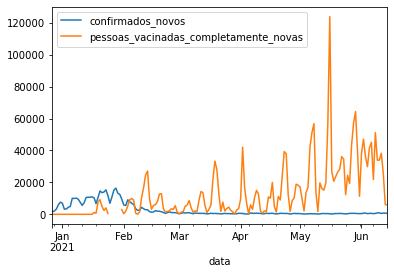

In [22]:
#Normalizar para ver pct
df.merge(df_vac,right_index=True,left_index=True)[["confirmados_novos","pessoas_vacinadas_completamente_novas"]].plot()

### Exercises


1. How does the R(t) correlates with vaccines?
2. Can we correlate the vaccines impact with covid cases? 
3. How long does it take to have an impact?